<a href="https://colab.research.google.com/github/hrhampapura/ams_ai_shortcourse_2025/blob/main/AMSAI2025_Imbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMS AI Short Course: Imblanced Data

This Colab Notebook demonstrates a synthetic model of imblanced data.

Comments based on discussion and thoughts:
1. Does SMOTE really work in practice ? The synthetic example shown here has a clean seperation boundary between majority and minority class
2. Get slides!


**Libraries**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

**Dataset**

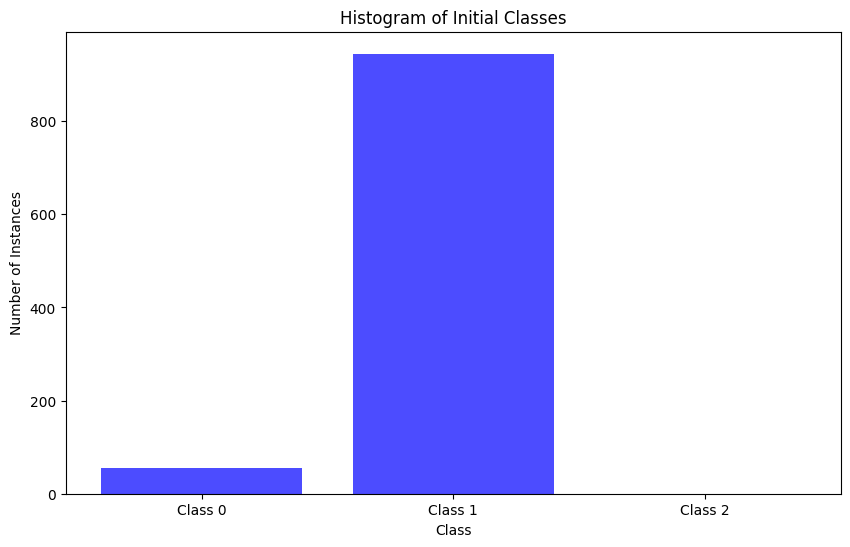

In [19]:
# Create an imbalanced dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    #n_classes=3,
    n_clusters_per_class=1,
    weights=[0.05, 0.95],  # Class imbalance
    #weights=[0.05, 0.35, 0.6],  # Class imbalance
    random_state=42
)

# Print the histogram of the initial classes
plt.figure(figsize=(10, 6))
plt.hist(y, bins=range(4), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title("Histogram of Initial Classes")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()

Handle Imbalanced Data: **Undersampling Technique**

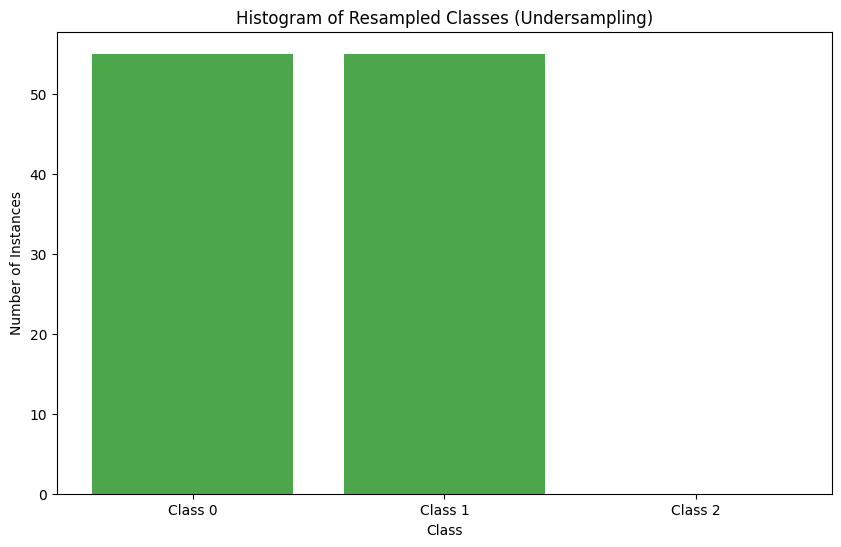

In [20]:
# Apply undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Print the histogram of the resampled classes
plt.figure(figsize=(10, 6))
plt.hist(y_resampled, bins=range(4), align='left', rwidth=0.8, color='green', alpha=0.7)
plt.title("Histogram of Resampled Classes (Undersampling)")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()

Handle Imbalanced Data: **Oversampling Technique**

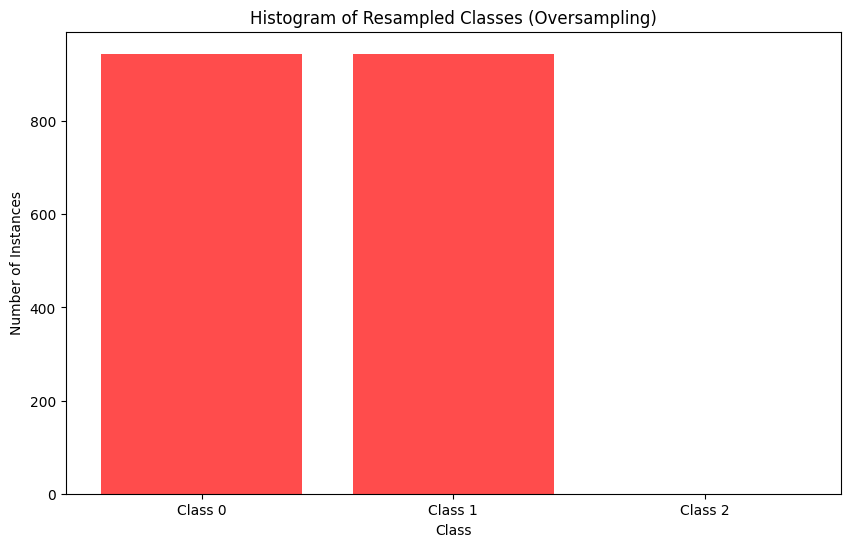

In [21]:
# Apply oversampling using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Print the histogram of the resampled classes
plt.figure(figsize=(10, 6))
plt.hist(y_resampled, bins=range(4), align='left', rwidth=0.8, color='red', alpha=0.7)
plt.title("Histogram of Resampled Classes (Oversampling)")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()

Handle Imbalanced Data: **Oversampling Technique - SMOTE**

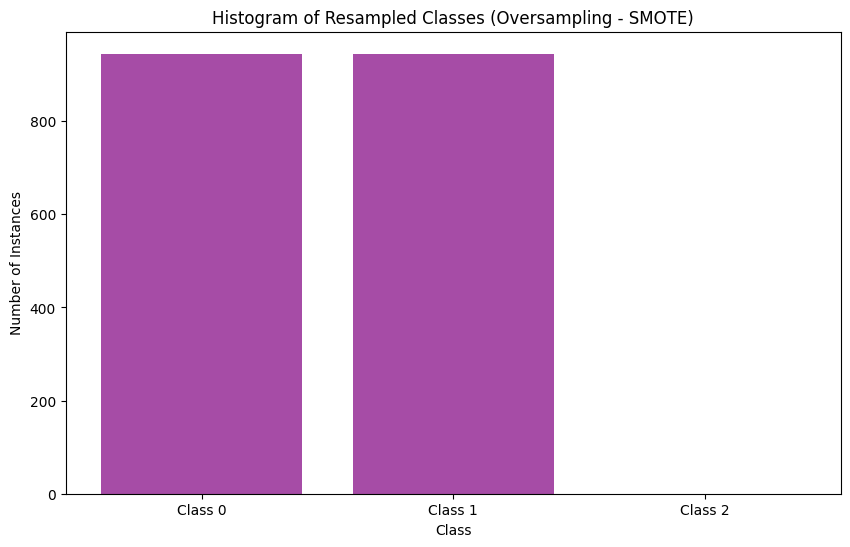

In [22]:
# Apply oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the histogram of the resampled SMOTE classes
plt.figure(figsize=(10, 6))
plt.hist(y_resampled, bins=range(4), align='left', rwidth=0.8, color='purple', alpha=0.7)
plt.title("Histogram of Resampled Classes (Oversampling - SMOTE)")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()

* Create the train and test sets for both the undersampled and oversampled datasets and fit them with a KNN classifier.

* Compare the accuracy of the undersampled and oversampled datasets.

In [23]:
# Split the original dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit KNN classifier on the original train set
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)

# Apply undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Apply oversampling using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Apply oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Fit KNN classifier on the undersampled train set
knn_undersampled = KNeighborsClassifier(n_neighbors=5)
knn_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Fit KNN classifier on the oversampled train set
knn_oversampled = KNeighborsClassifier(n_neighbors=5)
knn_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Fit KNN classifier on the oversampled SMOTE train set
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_smote, y_train_smote)

# Make predictions on train sets
y_train_pred_original = knn_original.predict(X_train)
y_train_pred_undersampled = knn_undersampled.predict(X_train_undersampled)
y_train_pred_oversampled = knn_oversampled.predict(X_train_oversampled)
y_train_pred_smote = knn_smote.predict(X_train_smote)

# Make predictions on test sets
y_test_pred_original = knn_original.predict(X_test)
y_test_pred_undersampled = knn_undersampled.predict(X_test)
y_test_pred_oversampled = knn_oversampled.predict(X_test)
y_test_pred_smote = knn_smote.predict(X_test)

# Calculate and print accuracy for train sets
print("Accuracy on Original Train Set:", accuracy_score(y_train, y_train_pred_original))
print("Accuracy on Undersampled Train Set:", accuracy_score(y_train_undersampled, y_train_pred_undersampled))
print("Accuracy on Oversampled Train Set:", accuracy_score(y_train_oversampled, y_train_pred_oversampled))
print("Accuracy on Oversampled SMOTE Train Set:", accuracy_score(y_train_smote, y_train_pred_smote))

# Calculate and print accuracy for test sets
print("\nAccuracy on Original Test Set:", accuracy_score(y_test, y_test_pred_original))
print("Accuracy on Undersampled Test Set:", accuracy_score(y_test, y_test_pred_undersampled))
print("Accuracy on Oversampled Test Set:", accuracy_score(y_test, y_test_pred_oversampled))
print("Accuracy on Oversampled SMOTE Test Set:", accuracy_score(y_test, y_test_pred_smote))


#print(classification_report(y_test, y_test_pred_smote))

Accuracy on Original Train Set: 0.96125
Accuracy on Undersampled Train Set: 0.8625
Accuracy on Oversampled Train Set: 0.9809210526315789
Accuracy on Oversampled SMOTE Train Set: 0.9453947368421053

Accuracy on Original Test Set: 0.965
Accuracy on Undersampled Test Set: 0.775
Accuracy on Oversampled Test Set: 0.93
Accuracy on Oversampled SMOTE Test Set: 0.845


**Accuracy comparison:**

* The undersampling technique suggests that the KNN model may be biased, and this is due to the undersampling itself.

* The oversampling technique suggests that the KNN model is overfitting, and this is due to the oversampling itself.

* Fitting the model without resampling shows good performance of the model, because accuracy is misleading with imbalanced data.

Ensemble Learning -- **Random Forest**


In [24]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest classifier on the train set
rf_classifier = RandomForestClassifier(class_weight={0:1, 1:2}, random_state=42)
#rf_classifier = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Calculate and print accuracy for the train set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on Train Set:", train_accuracy)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set:", test_accuracy)

#print(classification_report(y_test, y_test_pred))

Accuracy on Train Set: 1.0
Accuracy on Test Set: 0.985


In Random Forest, we didnâ€™t need to resample the dataset. Anyway, the results suggest a possible overfitting of the model. This may be due to the Random Forest features itself, so further investigations will require hyperparameters tuning.